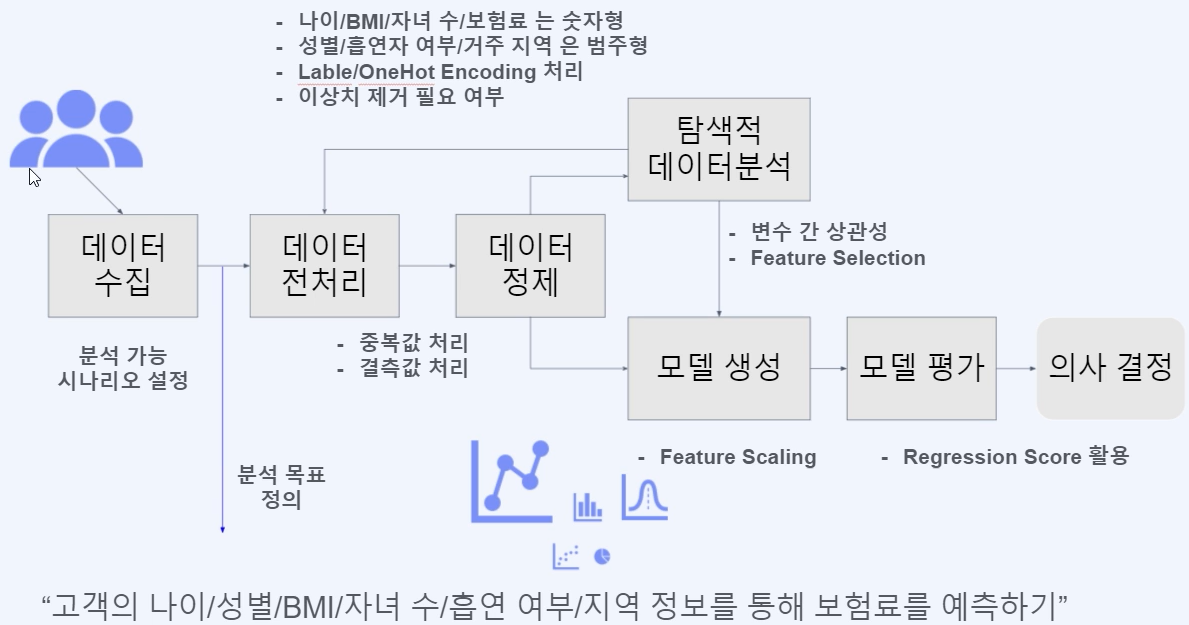

## 01. 데이터 소개 및 분석프로세스 수립

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

## 02. 데이터 준비를 위한 EDA 및 전처리

[EDA 체크리스트]

1. 어떤 질문을 풀거나 틀렸다고 증명하려고 하는가?
2. 중복된 항목은 있는가?
3. 어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는가?
4. 데이터에서 누락된 것이 있는지, 있다면 그것들을 어떻게 처리하려는가?
5. 이상치는 어디에 있는가? 관심을 가져야 할 데이터인가?
6. 변수 간 상관성이 있는가?

### 0. 데이터 불러오기

In [2]:
data = pd.read_csv('Ch 03/ch3_premium.csv')

### 1. 어떤 질문을 풀거나 틀렸다고 증명하려고 하는가?

> 보험사 고객 정보를 통해 보험료 예측 모델을 생성하려고 한다.

> 간략하게 데이터 살피기.

In [3]:
data.shape

(1338, 7)

In [4]:
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


- 고객ID처럼 명백하게 보험료와 관계없는 것은 없는가?
- 컬럼 중 의미가 이해가지 않는 것은 없는가?
- 약어나 전문 용어로 되어 있는 것은 없는가?

### 2. 중복된 항목은 있는가?

In [5]:
# 중복된 항목의 수 알아보기
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [6]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# 중복된 항목 수
print("중복된 항목 수 :", len(data[data.duplicated()]))

중복된 항목 수 : 1


In [8]:
# 중복된 항목 확인
data[data.duplicated()]

# 중복된 값을 모두 출력.
# data[data.duplicated(keep=False)]

# 중복 값이 많을 경우를 대비해 정렬.
# data[data.duplicated(keep=False)].sort_values(by=list(data.columns))

# 중복 값이 많을 경우를 대비해 head().
# data[data.duplicated(keep=False)].head())

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
# 중복된 항목 제거
# inplace: 원본 데이터에 반영.
# keep='first': 중복값 중 앞의 것을 남기기.
# ignore_index: resulting axis will be labeled.
data.drop_duplicates(inplace=True, keep='first', ignore_index = True)

In [10]:
data.shape

(1337, 7)

### 3. 어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는가?

> 총 컬럼 수와 컬럼별 데이터 타입 확인

In [11]:
# 데이터 컬럼 이름/타입 정보 확인하기.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [12]:
data.dtypes.reset_index()

,index,0
0,age,int64
1,sex,object
2,bmi,float64
3,children,int64
4,smoker,object
5,region,object
6,charges,float64


In [13]:
dtype_data = data.dtypes.reset_index()
dtype_data.columns = ['Count', 'Column Type']
dtype_data.groupby('Column Type').aggregate('count')

,Count
Column Type,
int64,2
float64,2
object,3


In [14]:
# 데이터 타입별 컬럼 수 확인하기.
dtype_data = data.dtypes.reset_index()
dtype_data.columns = ['Count', 'Column Type']
dtype_data = dtype_data.groupby('Column Type').aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64      2
1     float64      2
2      object      3


- 숫자형 데이터 중 명백하게 포함할 의미가 없는 것은 없는가?
- 범주형 변수는 있는가?

- 범주형 변수: sex, smoker, region

In [15]:
data.select_dtypes(include=['object', 'category'])

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1332,male,no,northwest
1333,female,no,northeast
1334,female,no,southeast
1335,female,no,southwest


In [16]:
data.select_dtypes(include=['object', 'category']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(col)

sex
smoker
region


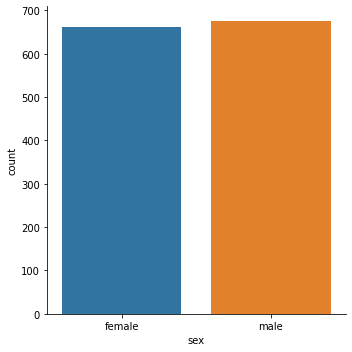

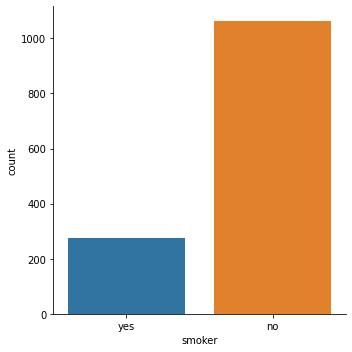

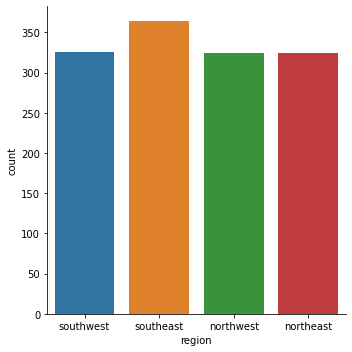

In [18]:
for col in data.select_dtypes(include=['object', 'category']).columns:
    fig = sns.catplot(x=col, kind='count', data=data, hue=None)
    print(fig)

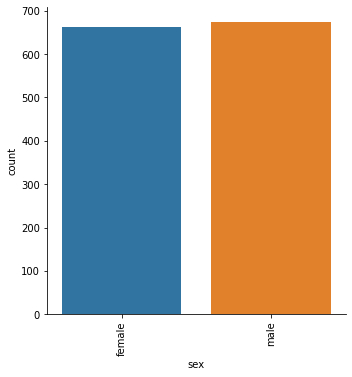

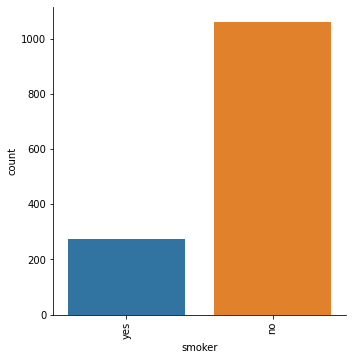

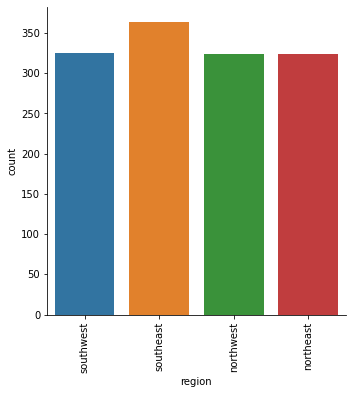

In [19]:
# 범주형 변수별 개수 시각화.
for col in data.select_dtypes(include=['object', 'category']).columns:
    fig = sns.catplot(x=col, kind='count', data=data, hue=None)
    fig.set_xticklabels(rotation=90)
    plt.show()

In [20]:
# 데이터 컬럼별 고유한 값 개수 확인하기.
print(data.select_dtypes(include=['object', 'category']).nunique())

sex       2
smoker    2
region    4
dtype: int64


항목이 2개인 성별과 흡연 여부는 LabelEncoder, 지역은 OneHotEncoder를 사용.

In [21]:
# LabelEncoder: 각각의 범주를 서로 다른 정수로 mapping.
## 성별, 흡연 여부 column은 Label Encoding을 위해 ndarray로 변환.
sex = data.iloc[:, 1:2].values
smoker = data.iloc[:, 4:5].values

In [22]:
print(sex[:, 0])

['female' 'male' 'male' ... 'female' 'female' 'female']


In [24]:
le = LabelEncoder()

sex[:, 0] = le.fit_transform(sex[:, 0])
print(sex[:, 0]) # label이 붙음.
print(type(sex[:, 0])) # ndarray를 df로 변환해주어야 함.

[0 1 1 ... 0 0 0]
<class 'numpy.ndarray'>


In [25]:
# 성별
# 1. LabelEncoder 선언
le = LabelEncoder()

# 2. 성별을 fit_transform에 넣어줌.
sex[:, 0] = le.fit_transform(sex[:, 0])
sex = pd.DataFrame(sex)
sex.columns = ['sex'] # column명도 다시 붙이기.

In [26]:
## 성별, 흡연 여부 column은 Label Encoding을 위해 ndarray로 변환.
sex = data.iloc[:, 1:2].values
smoker = data.iloc[:, 4:5].values

# 성별
# 1. LabelEncoder 선언
le = LabelEncoder()

# 2. 성별을 fit_transform에 넣어줌.
sex[:, 0] = le.fit_transform(sex[:, 0])
sex = pd.DataFrame(sex)
sex.columns = ['sex'] # column명도 다시 붙이기.

# 3. dict 형으로 변환.
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('성별에 대한 Label Encoder 결과 : ')
print(le_sex_mapping)
print(sex[:10])

성별에 대한 Label Encoder 결과 : 
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [27]:
# 흡연 여부
le = LabelEncoder()

smoker[:, 0] = le.fit_transform(smoker[:, 0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
print(smoker)

le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('흡연 여부에 대한 Label Encoder 결과 : ')
print(le_smoker_mapping)
print(smoker[:10])

     smoker
0         1
1         0
2         0
3         0
4         0
...     ...
1332      0
1333      0
1334      0
1335      0
1336      1

[1337 rows x 1 columns]
흡연 여부에 대한 Label Encoder 결과 : 
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


One-Hot Encoding

In [28]:
region = data.iloc[:, 5:6].values

ohe = OneHotEncoder()

print(ohe.fit_transform(region).toarray())
print(data.head(10))

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [29]:
# OneHot Encoder: 각각의 범주를 0과 1로 mapping.
# 지역
region = data.iloc[:, 5:6].values

ohe = OneHotEncoder()

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print('지역에 대한 One Hot Encoder 결과 : ')
print(region[:10])

지역에 대한 One Hot Encoder 결과 : 
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


### 4. 데이터에서 누락된 것이 있는지, 있다면 그것들을 어떻게 처리하려는가?

> NULL 값이 포함된 컬럼 찾기 -> 각 컬럼의 평균값으로 채우기 (Imputation 또는 보간법)

In [30]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1332,False,False,False,False,False,False,False
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False


In [31]:
data.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

bmi    5
dtype: int64


<AxesSubplot:>

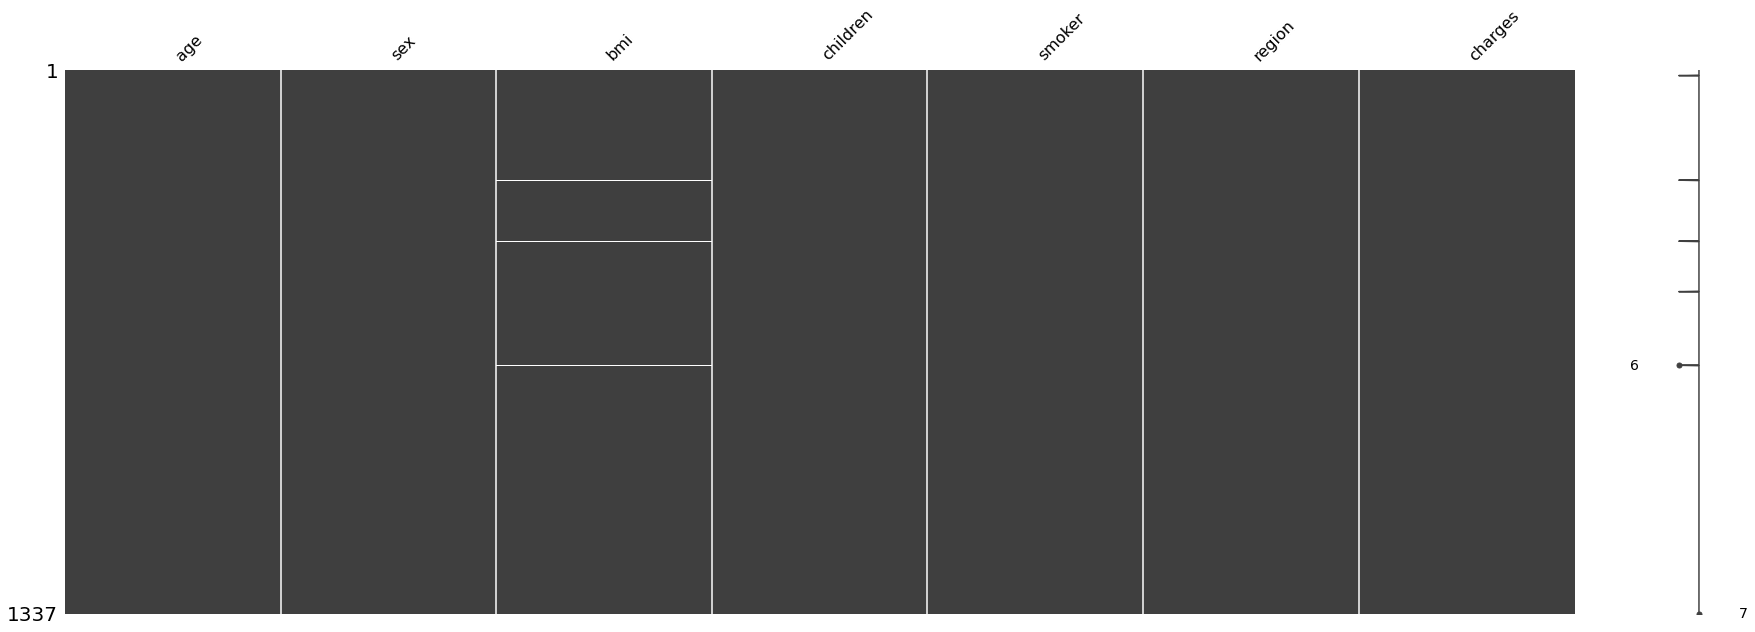

In [32]:
# 각 컬럼들에 몇 개의 NULL 값이 포함되어 있는지 확인
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

# missingno를 통한 시각화 확인.
missingno.matrix(data, figsize=(30, 10))

<AxesSubplot:>

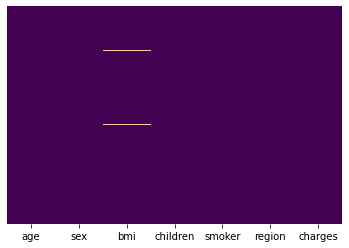

In [33]:
# seabor을 통한 시각화.
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  39.820000         0     no  sou

<AxesSubplot:>

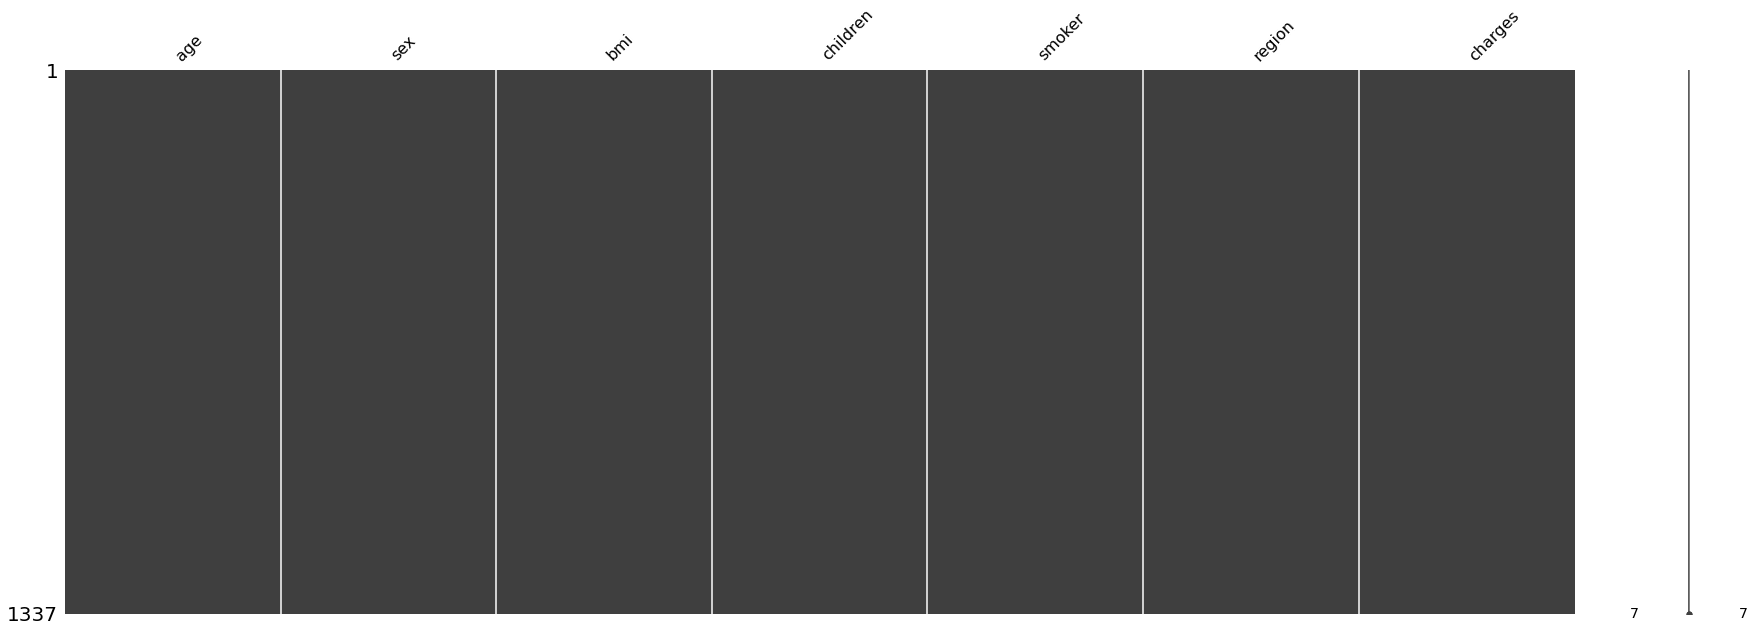

In [34]:
# NULL 값을 해당 컬럼의 평균값으로 대체하기
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
print(data.head(15))

# 확인
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

# missingno 패키지를 통해 시각화 재확인.
missingno.matrix(data, figsize = (30, 10))

### 5. 이상치는 어디에 있는가? 관심을 가져야 할 데이터인가?

> 숫자형 데이터별 요약 통계값 확인

In [35]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.658596,1.095737,13279.121487
std,14.044333,6.083657,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.600000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.658596,6.083657,15.9600,26.315,30.4000,34.60000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [22]:
# 데이터 컬럼별 요약 통계값 보기.
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.658596,6.083657,15.9600,26.315,30.4000,34.60000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<AxesSubplot:ylabel='Frequency'>

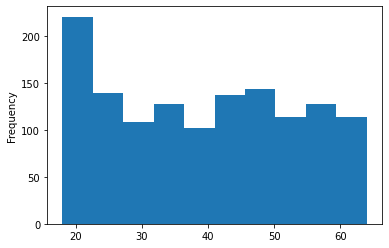

In [23]:
# 데이터 개별 컬럼 히스토그램으로 확인하기.
data.age.plot.hist()

In [24]:
import scipy
scipy.__version__

'1.5.4'

> 숫자형 데이터 Skewness 확인

In [38]:
# 숫자형 데이터의 컬럼들만 가져오기
data.select_dtypes(include=np.number)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


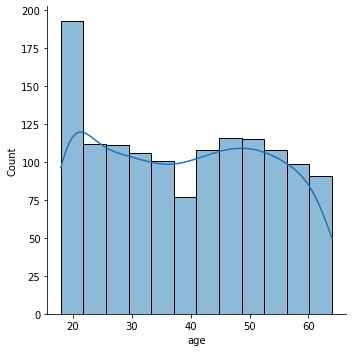

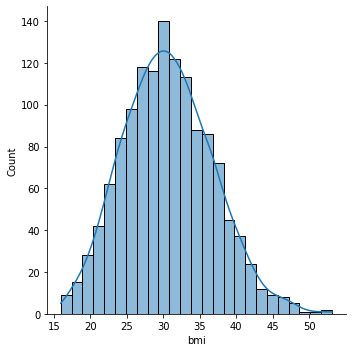

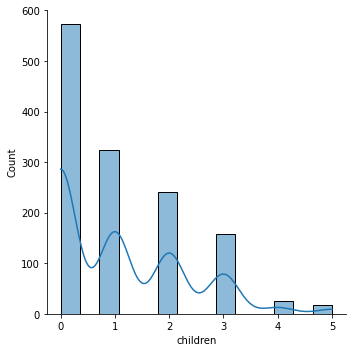

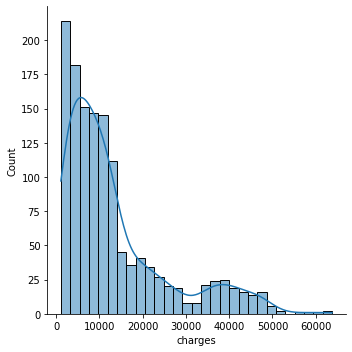

In [45]:
# 데이터 컬럼 타입이 np.number 인 것만 가져오기
numeric_data = data.select_dtypes(include=np.number)

# 데이터 컬럼 타입이 np.number 인 컬럼 이름들 가져오기
l = numeric_data.columns.values
number_of_columns = 4
number_of_rows = len(l) - 1 / number_of_columns

# 컬럼별 히스토그램 그리기

# plt.figure(figsize=(20,20))
for i in range(0, len(l)):
    # plt.subplot(number_of_rows + 1.number_of_columns.i+1)
    sns.displot(numeric_data[l[i]], kde=True) # kde: kernel density

> 숫자형 데이터 Box Plot 시각화

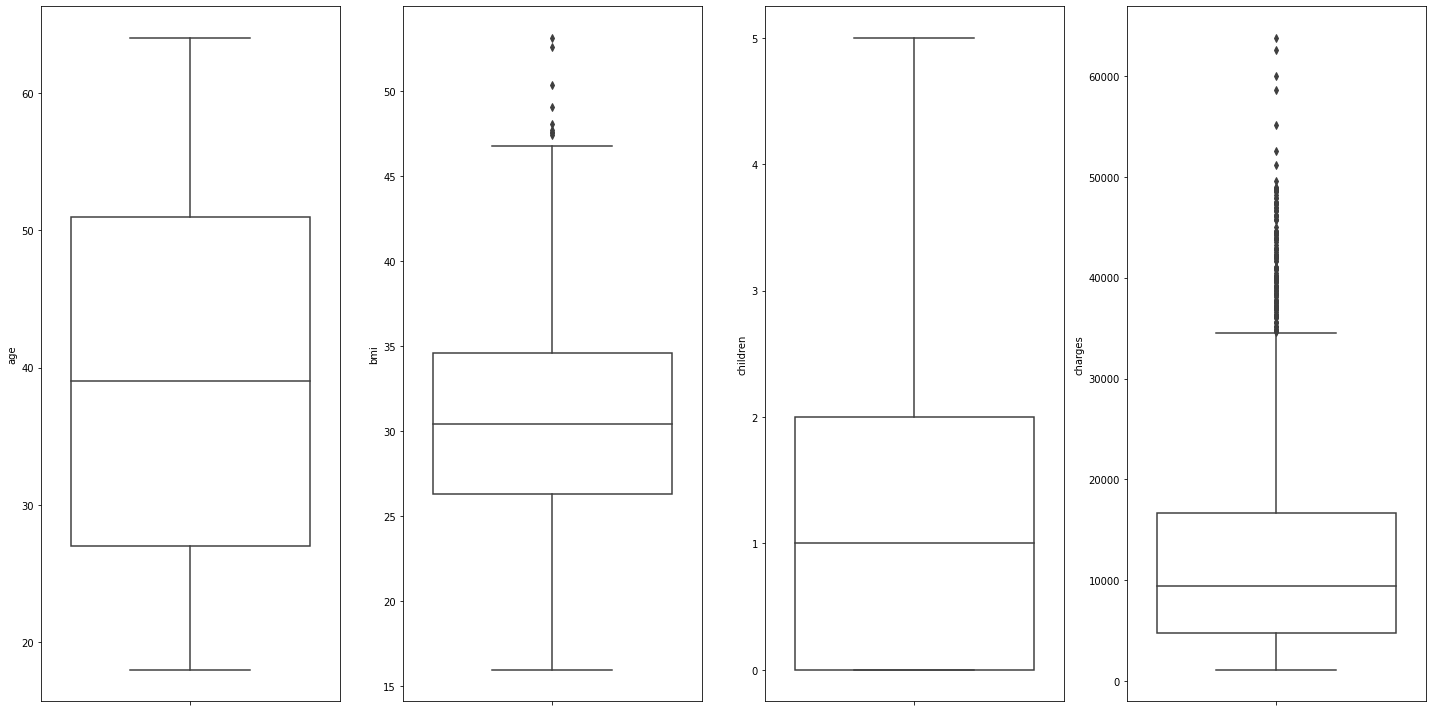

In [46]:
# 데이터 컬럼 타입이 np.number인 컬럼들 가져오기
columns = data.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=data, boxprops={'facecolor': 'None'})
figure.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정.
plt.show()

C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/2956091241.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1, number_of_columns, i+1)
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/2956091241.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor 

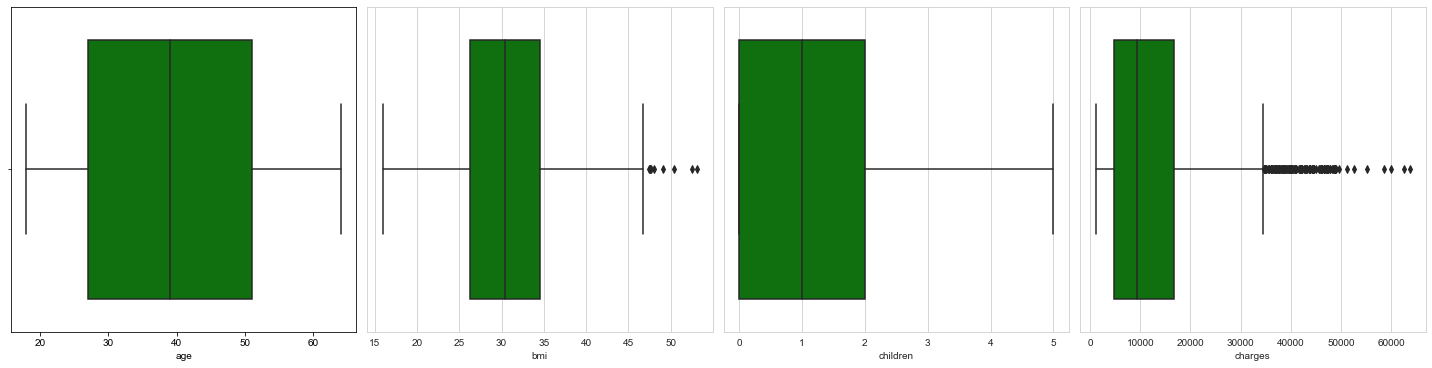

In [47]:
plt.figure(figsize=(20, 20))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(numeric_data[l[i]], color='green', orient='v')
    plt.tight_layout()

> 범주형 데이터별 violin plot 시각화

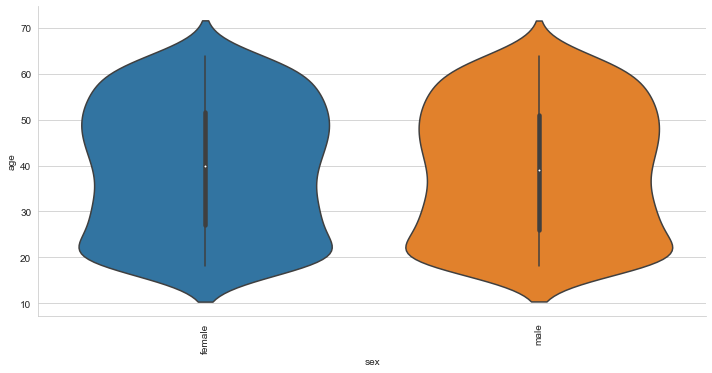

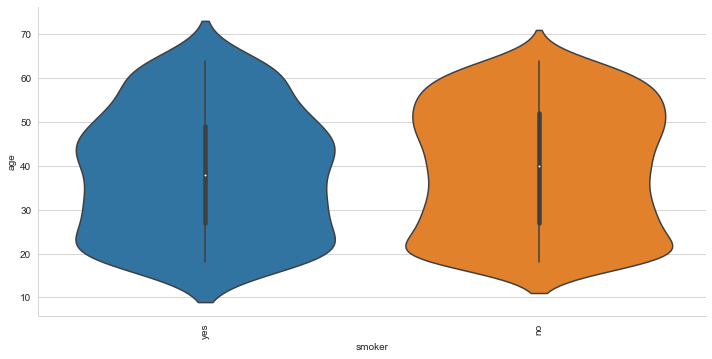

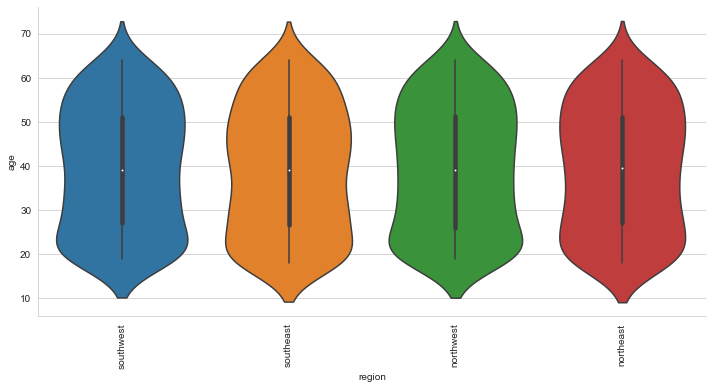

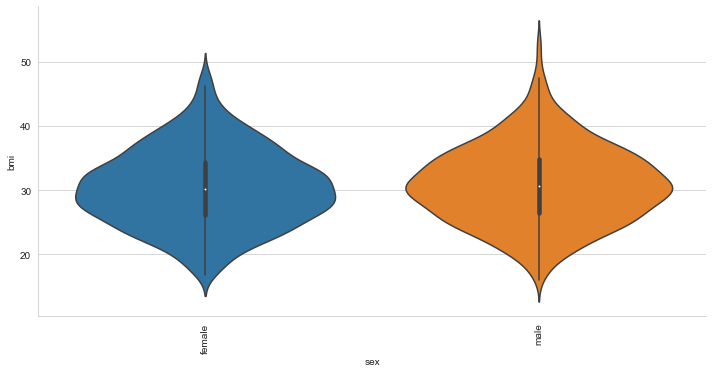

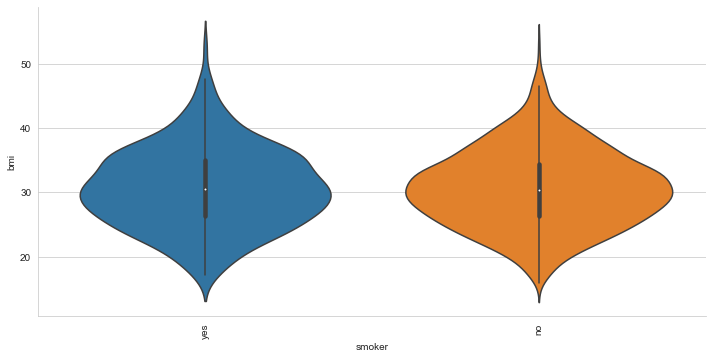

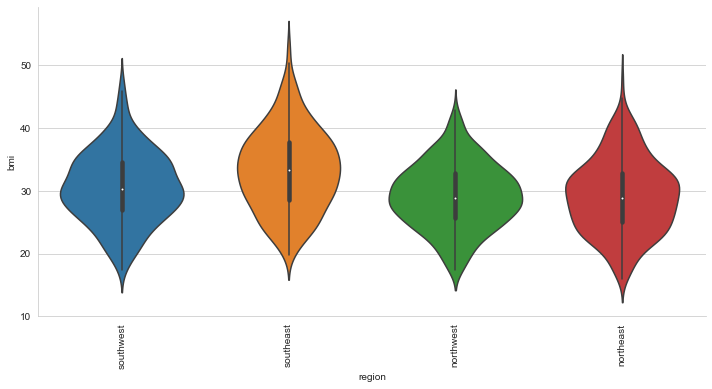

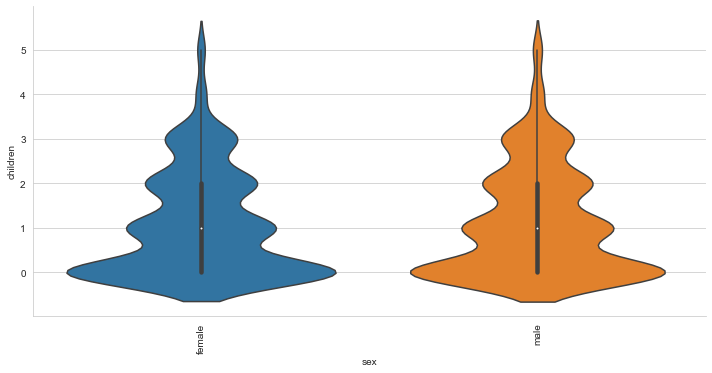

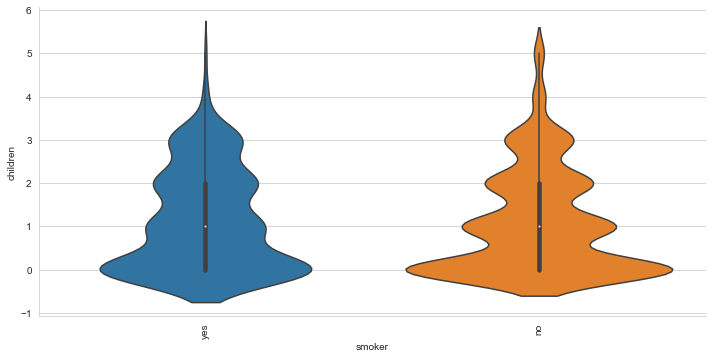

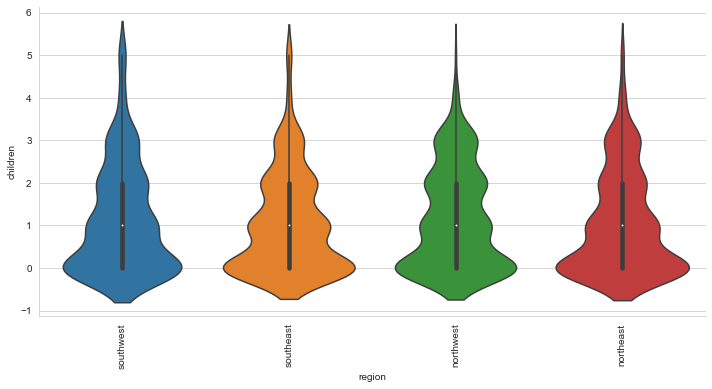

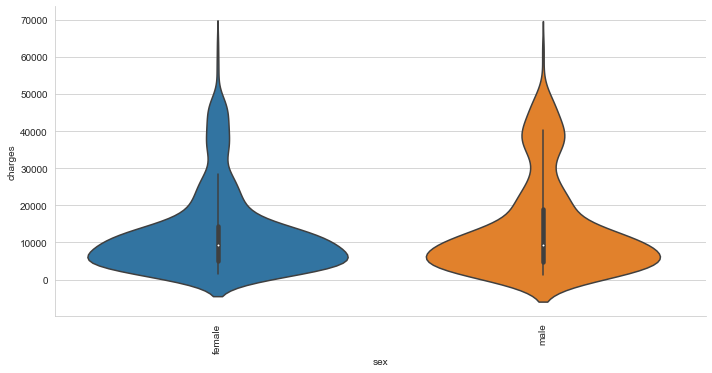

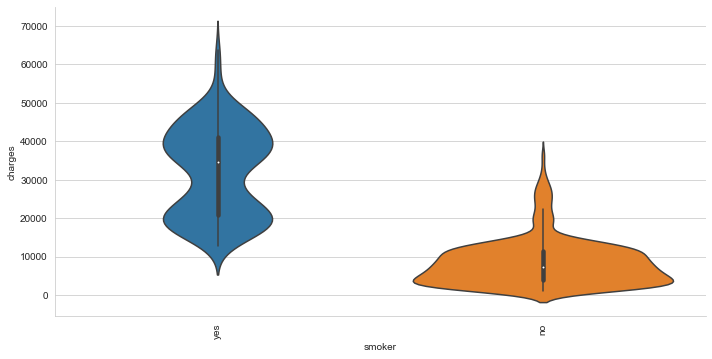

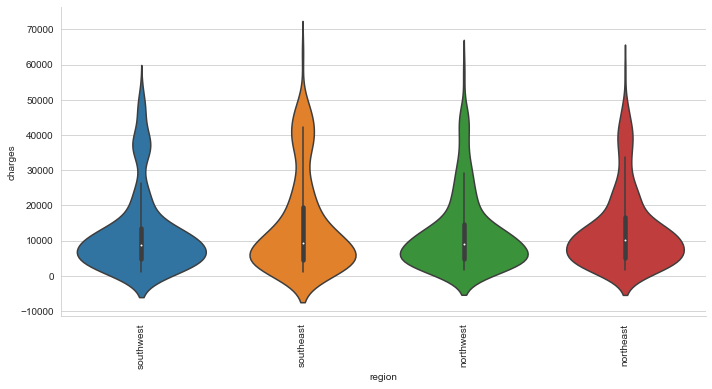

In [48]:
# 범주형 데이터가 하나라도 있으면,
if len(data.select_dtypes(include=['object', 'category']).columns) > 0:
    # 숫자형 데이터
    for col_num in data.select_dtypes(include=np.number).columns:
        # 범주형 데이터
        for col in data.select_dtypes(include=['object', 'category']).columns:
            fig = sns.catplot(x=col, y=col_num, kind='violin', data=data, height=5, aspect=2)
            fig.set_xticklabels(rotation=90)
            plt.show()

### 6. 변수 간 상관성이 있는가?

> 숫자형 데이터 간 Pairwise 결합 분포 시각화

<AxesSubplot:>

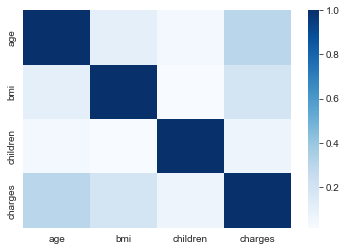

In [49]:
# Seaborn Heatmap을 사용한 Correlation 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), cmap='Blues', annot=False)

<AxesSubplot:>

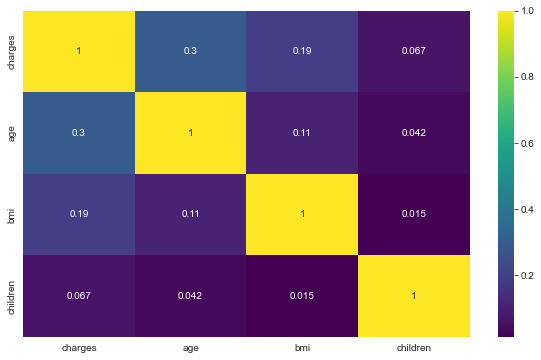

In [50]:
# 보험료 Correlation Matrix 시각화.
k = 4 # Heatmap 에서 확인한 변수 개수
cols = data.corr().nlargest(k, 'charges')['charges'].index
cm = data[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis')

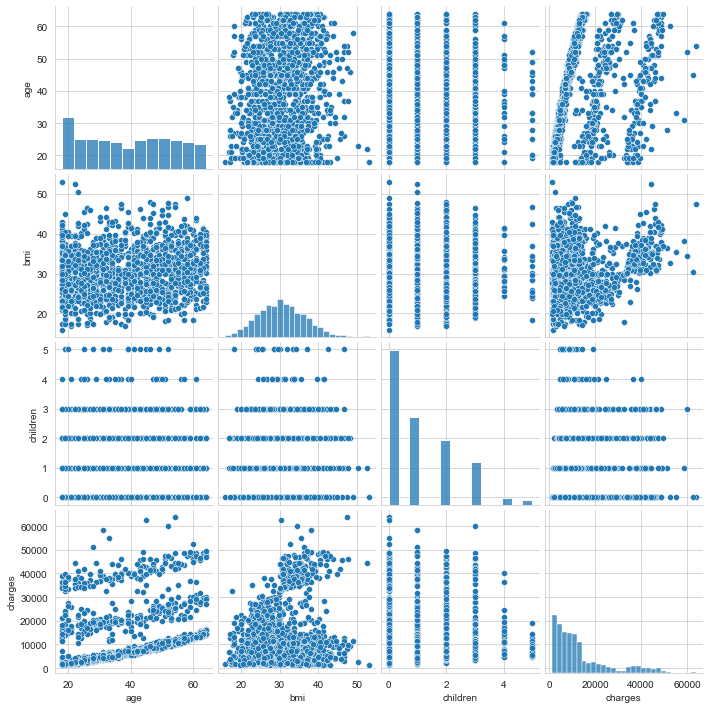

In [51]:
# 숫자 변수형 컬럼들 간 Pairplot 그리기
# 선형성이 있지는 않을까?
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

> 범주형 데이터를 기준으로 추가한 시각화

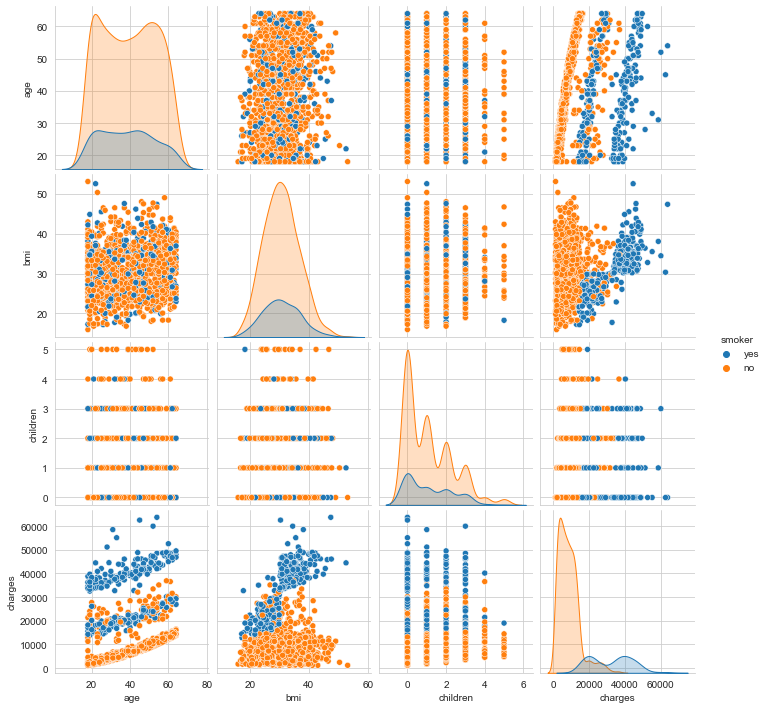

In [34]:
hue = 'smoker'
sns.pairplot(data.select_dtypes(include=np.number).join(data[[hue]]), hue=hue)
plt.show()

## 03. 다양한 Regression을 활용한 보험료 예측

### Training, Test 데이터 나누기

In [52]:
# 숫자형 데이터들만 copy() 를 사용하여 복사
X_num = data[['age', 'bmi', 'children']].copy()

# 변환했던 범주형 데이터들과 concat을 사용하여 합치기
# axis=1은 column, 0은 row.
X_final = pd.concat([X_num, region, sex, smoker], axis=1)

# 보험료 컬럼(charges)을 y값으로 설정
y_final = data[['charges']].copy()

# train_test_split (2:1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

In [53]:
X_train[0:10]

,age,bmi,children,northeast,northwest,southeast,southwest,sex,smoker
905,27,32.585,3,1.0,0.0,0.0,0.0,1,0
2,28,33.000,3,0.0,0.0,1.0,0.0,1,0
405,52,38.380,2,1.0,0.0,0.0,0.0,0,0
481,49,37.510,2,0.0,0.0,1.0,0.0,1,0
338,50,32.300,1,1.0,0.0,0.0,0.0,1,1
356,46,43.890,3,0.0,0.0,1.0,0.0,1,0
1258,52,23.180,0,1.0,0.0,0.0,0.0,0,0
182,22,19.950,3,1.0,0.0,0.0,0.0,1,0
461,42,30.000,0,0.0,0.0,0.0,1.0,1,1
1058,32,33.820,1,0.0,1.0,0.0,0.0,1,0


In [54]:
X_test[0:10]

,age,bmi,children,northeast,northwest,southeast,southwest,sex,smoker
1247,18,39.820,0,0.0,0.0,1.0,0.0,0,0
609,47,29.370,1,0.0,0.0,1.0,0.0,0,0
393,49,31.350,1,1.0,0.0,0.0,0.0,1,0
503,19,30.250,0,0.0,0.0,1.0,0.0,1,1
198,51,18.050,0,0.0,1.0,0.0,0.0,0,0
820,26,17.670,0,0.0,1.0,0.0,0.0,1,0
31,18,26.315,0,1.0,0.0,0.0,0.0,0,0
1250,19,19.800,0,0.0,0.0,0.0,1.0,1,0
1298,19,25.745,1,0.0,1.0,0.0,0.0,0,0
1150,58,36.480,0,0.0,1.0,0.0,0.0,0,0


### Feature Scaling

- 다차원의 값들을 비교 분석하기 쉽게 만든다.
- 변수들 간 단위 차이가 있을 경우 필요.
- Overflow, Underflow를 방지.

In [55]:
# MinMaxScaler를 사용하는 경우: 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축.
# max와 min을 이용 => 엄청 큰 이상치와 min을 빼고,
# 일반적인 값들을 비교하면 max에 비해 일반치들이 거의 보이지 않게 됨.
'''
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test = n_scaler.transform(X_test.astype(np.float))
'''
# StandardScaler를 사용하는 경우: 이상치가 있는 경우 균형 잡힌 결과를 보장하기 힘듦.
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# RobustScaler를 사용하는 경우: 이상치 영향을 최소화. 중앙값과 IQR 사용.
# 표준화 후 동일한 값을 더 넓게 분포시키게 된다.

C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/1664228474.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/1664228474.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


### Regression 절차 요약

- ****Regression()
- fit()
- predict()
- score()

### Linear Regression 적용

In [56]:
# fit model
lr = LinearRegression().fit(X_train, y_train)

# predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Score 확인
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train, y_train),
lr.score(X_test, y_test)))

lr.coef_: [[3366.47112808 1725.71174012  603.99554217  268.25231121   14.31590009
   -13.39447522 -261.68008702  -71.08965939 9503.10176814]]
lr.intercept_: [13098.07379314]
lr train score 0.743, lr test score: 0.758


### Polynomial Regression 적용

In [57]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_final, test_size=0.33, random_state=0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# fit model
poly_lr = LinearRegression().fit(X_train, y_train)

# predict
y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

# Score 확인
print('poly train score %.3f, poly test score: %.3f' %(
poly_lr.score(X_train, y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.836, poly test score: 0.827


C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/2701202576.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/2701202576.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


### Support Vector Regression 적용

In [58]:
svr = SVR(kernel='linear', C=300)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# fit model
svr = svr.fit(X_train, y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Score 확인
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train, y_train),
svr.score(X_test, y_test)))

svr train score 0.715, svr test score: 0.718


C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/553500471.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/553500471.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


### RandomForest Regression 적용

In [59]:
forest = RandomForestRegressor(n_estimators = 100,
                               criterion = 'mse',
                               random_state = 1,
                               n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

# fit model
forest.fit(X_train, y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Score 확인
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train, y_train),
forest.score(X_test, y_test)))

C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/1975868231.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/1975868231.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= sc.transform(X_test.astype(np.float))
c:\python\pytho

forest train score 0.975, forest test score: 0.842


### Decision Tree Regression 적용

In [60]:
dt = DecisionTreeRegressor(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

# fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Score 확인
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.999, dt test score: 0.701


C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/947122388.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\jjoro\AppData\Local\Temp/ipykernel_6888/947122388.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= sc.transform(X_test.astype(np.float))


### 다양한 모델 성능 종합 비교

In [61]:
# 앞에서 만든 regressor 변수들과 라벨을 묶어서 하나의 리스트로 모으기
regressors = [(lr, 'Linear Regression'),
                (poly_lr, 'Polynomial Regression'),
                (svr, 'SupportVector Regression'),
                (forest, 'RandomForest Regression'),
                (dt, 'DecisionTree')]

# 각 regressor 변수들과 라벨 묶음을 차례로 fit -> predict -> score 로 처리해서 보여주기
for reg, label in regressors:
    print(80*'_', '\n')
    reg = reg.fit(X_train,y_train.values.ravel())
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    print(f'{label} train score %.3f, {label} test score: %.3f' % (
    reg.score(X_train,y_train),
    reg.score(X_test, y_test)))

________________________________________________________________________________ 

Linear Regression train score 0.743, Linear Regression test score: 0.758
________________________________________________________________________________ 

Polynomial Regression train score 0.743, Polynomial Regression test score: 0.758
________________________________________________________________________________ 

SupportVector Regression train score 0.715, SupportVector Regression test score: 0.718
________________________________________________________________________________ 



c:\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForest Regression train score 0.975, RandomForest Regression test score: 0.842
________________________________________________________________________________ 

DecisionTree train score 0.999, DecisionTree test score: 0.701
